In [43]:
"""
@author: maximefontana
"""
# System
import sys

# Graph Data
import snap
import networkx as nx

# Scientific Computing 
import numpy as np
import scipy
import pandas as pd
import csv

# Math
import random as ran
from time import time

# Custom imports
%run Algorithms.ipynb
%run ClusteringEvaluation.ipynb
%run PlotFunctions.ipynb
%run GroundTruthGen.ipynb
%run SBM.ipynb

# Specific models
from sklearn.cluster import SpectralClustering, KMeans
from sklearn import metrics
from sklearn import preprocessing

# Plotting
#import tensorflow as tf
from matplotlib import pyplot as plt

In [44]:
def perturbation_remove_nodes(G, p, random=False, greatest_degrees=False):
    size = len(G)
    proportion = np.ceil((p*size) / 100)
    
    if random:
        random_partition = ran.sample(list(G.nodes()), int(proportion))
        G.remove_nodes_from(random_partition)
        
    if greatest_degrees:
        sorted_degrees = sorted(list(G.degree()), key=lambda x: x[1], reverse=True)
        sub_portion = sorted_degrees[:int(proportion)]
        sub_portion_2 = [item[0] for item in sub_portion]
        G.remove_nodes_from(sub_portion_2)
        
    return G

In [45]:
df = pd.read_csv('datasets/Facebook-known-pairs_data_2013.csv')

In [46]:
# Take a glance at what the data looks like
df

,1 984 0
0,1 883 1
1,1 941 0
2,1 650 0
3,1 132 1
4,1 601 0
...,...
4509,1543 1594 1
4510,1543 1784 1
4511,1594 1828 1
4512,1594 1784 1


In [47]:
# Transform the only column into a list of tuples
connections = tuple(list(df['1 984 0']))
print(connections)

('1 883 1', '1 941 0', '1 650 0', '1 132 1', '1 601 0', '1 63 0', '1 1214 0', '1 339 1', '1 653 1', '1 213 0', '1 545 1', '1 214 0', '1 181 0', '1 325 0', '1 520 0', '1 1594 0', '1 777 0', '1 428 0', '1 190 0', '1 447 0', '1 763 0', '1 448 0', '1 171 1', '1 923 0', '1 117 1', '1 65 0', '1 196 1', '1 274 0', '1 487 0', '1 587 1', '1 372 1', '1 147 1', '1 80 0', '1 945 0', '1 1828 0', '1 488 0', '1 55 1', '1 353 0', '1 429 0', '1 440 0', '1 954 0', '1 346 0', '1 525 0', '1 859 1', '1 106 1', '1 201 0', '1 871 0', '1 504 1', '1 471 1', '1 275 0', '1 425 1', '1 170 1', '1 939 1', '1 634 0', '1 70 0', '1 1339 0', '1 1212 0', '1 387 0', '1 272 1', '1 725 0', '1 124 0', '1 184 0', '1 3 1', '1 544 0', '1 441 0', '1 85 0', '1 280 0', '1 145 0', '1 119 1', '1 991 0', '1 494 1', '1 202 0', '1 649 0', '1 149 0', '1 1218 0', '1 857 0', '1 62 0', '1 205 1', '1 265 1', '1 9 0', '1 779 1', '1 364 1', '1 240 1', '1 477 1', '1 101 1', '1 343 0', '1 884 1', '3 504 1', '3 171 1', '3 871 0', '3 119 0', '3 

156


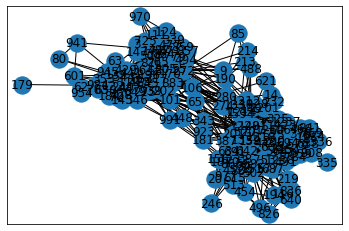

In [48]:
# Construct the graphs by adding edges representing friendships
G = nx.Graph()
for i in range(len(connections)):
    connec = int(connections[i].split(" ")[2])
    if connec == 1:
        vertice_string = int(connections[i].split(" ")[0]) # to get the first element of the string
        vertice_connection = int(connections[i].split(" ")[1]) # to get the second element of the string
        G.add_edge(vertice_string, vertice_connection)

print(len(G.nodes()))
nx.draw_networkx(G)
plt.show()

In [49]:
### NOW TO DEAL WITH HOW TO ADD GENDERS TO STUDENTS' IDs
students_list = []
with open('datasets/metadata_2013.txt', newline = '') as students:                                                                                          
        student_reader = csv.reader(students, delimiter='\t')
        for student in student_reader:
            students_list.append(student)
            
pd.DataFrame(students_list).to_csv("datasets/students2013.csv")
data = pd.read_csv('datasets/students2013.csv')

elems_to_remove = np.asarray(data[data['2'] == 'Unknown']['0'])
print(elems_to_remove) 

[ 34  41 243 420  58 209 979]


In [50]:
for i in range(len(elems_to_remove)):
    if elems_to_remove[i] in G.nodes():
        G.remove_node(elems_to_remove[i])
        
        
print(len(G))
#perturbation_remove_nodes(G, 50, greatest_degrees = True)
#print(len(G))

155


In [51]:
# Clean the rows with 'Unknown' gender
data = data.drop(data[data['2'] == 'Unknown'].index)
data.shape # Verify new shape (7 rows removed)

(322, 4)

In [52]:
data

,Unnamed: 0,0,1,2
0,0,650,2BIO1,F
1,1,498,2BIO1,F
2,2,627,2BIO1,F
3,3,857,2BIO1,F
4,4,487,2BIO1,F
...,...,...,...,...
317,317,642,MP,M
318,318,245,MP,F
319,319,525,MP,F
327,327,205,2BIO3,M


In [53]:
# Powerset of female students
x = np.asarray(data['0'].where(data['2'] == 'F'))
x = x[~np.isnan(x)]
print(np.sort(x))

[  39.   45.   46.   47.   55.   61.   62.   63.   70.   72.   79.   80.
   85.   87.  101.  106.  111.  119.  120.  122.  124.  125.  132.  134.
  145.  156.  160.  165.  170.  172.  173.  176.  177.  179.  199.  202.
  210.  211.  213.  214.  222.  226.  232.  239.  240.  242.  245.  252.
  255.  257.  258.  265.  268.  272.  275.  277.  280.  285.  295.  312.
  333.  339.  343.  346.  364.  374.  388.  391.  400.  425.  434.  440.
  441.  443.  447.  450.  454.  464.  465.  468.  471.  478.  486.  487.
  489.  491.  498.  502.  504.  520.  525.  531.  545.  548.  576.  577.
  587.  601.  612.  626.  627.  637.  647.  649.  650.  674.  681.  694.
  706.  720.  753.  763.  765.  777.  778.  779.  784.  797.  809.  836.
  843.  845.  854.  857.  867.  874.  883.  884.  886.  894.  908.  920.
  921.  927.  941.  945.  954.  958.  970.  984. 1201. 1332. 1342. 1412.
 1594. 1894.]


In [54]:
# Powerset of male students
y = np.asarray(data['0'].where(data['2'] == 'M'))
y = y[~np.isnan(y)].astype(int)
print(np.sort(y))

[   1    2    3    4    9   14   15   20   21   27   28   32   38   48
   54   65   71   89   90   92  103  115  116  117  131  147  149  151
  159  171  181  184  185  190  194  196  200  201  205  219  220  227
  236  241  246  248  253  254  256  267  269  274  276  279  290  306
  311  322  325  327  335  353  356  366  372  376  382  387  390  407
  413  424  428  429  435  438  445  446  448  452  453  466  475  477
  480  484  488  492  494  496  497  510  513  527  533  544  564  582
  603  605  615  621  622  624  634  638  640  642  653  655  658  677
  687  691  702  725  743  744  751  769  771  786  790  791  798  826
  841  859  866  869  871  882  893  909  917  923  938  939  959  960
  974  977  991  998 1067 1204 1212 1214 1216 1218 1228 1232 1237 1238
 1260 1295 1320 1324 1336 1339 1345 1359 1366 1383 1401 1423 1485 1512
 1518 1519 1543 1784 1805 1819 1828 1870]


In [55]:
# So there are 322 Students (176 male students & 146 female students) in the big metadata file
# We have 155 students in our dataset

x_y_join = np.concatenate((x, y)).astype(int)
difference = np.setdiff1d(x_y_join, np.asarray(G.nodes()))
print(difference)

[   2    4   15   21   27   28   32   39   45   46   47   48   54   61
   71   72   79   87   89   90   92  103  115  120  131  134  160  165
  172  173  176  177  185  199  200  210  211  220  222  226  227  236
  239  241  242  248  252  253  254  255  256  257  258  267  268  269
  276  277  279  285  295  306  311  312  322  327  333  356  366  374
  382  388  390  391  400  407  413  424  434  435  438  443  445  446
  450  453  464  465  468  475  478  480  484  486  489  492  497  498
  510  527  531  533  548  603  612  622  626  627  637  647  655  658
  674  677  681  702  706  720  743  744  751  765  771  778  784  786
  790  791  798  809  843  845  854  867  874  882  886  893  894  909
  917  920  921  927  938  958  960  974  998 1204 1216 1295 1320 1324
 1342 1345 1359 1366 1383 1412 1485 1512 1518 1519 1805 1819 1894]


In [56]:
# Now let's remove elements that we do not have in our graph from our powerset
for i in range(len(difference)):
    if difference[i] in x:
        x = np.delete(x, np.where(x == difference[i]))
    elif difference[i] in y:
        y = np.delete(y, np.where(y == difference[i]))
        
print(len(x))
print(len(y))
print("Equal size between nodes and gender list ?", len(x)+len(y) == len(G.nodes()))

70
85
Equal size between nodes and gender list ? True


In [57]:
# Now that we have everything, our dataset made of 155 students as well as their genders
female_students = x 
male_students = y

In [58]:
gender_partition = np.zeros(len(G.nodes()))

In [59]:
# Fill in gender partition 

for i in range(len(G.nodes())):
    if list(G)[i] in female_students:
        gender_partition[i] = 0
    elif list(G)[i] in male_students:
        gender_partition[i] = 1
        
print(gender_partition)

[1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [60]:
fair_results = []
unfair_results = []
dataset_fairness = []


for k in range(2,16):
    labels = un_spectral(G, k)
    fair_labels = un_spectral_fair(G, k, labels)
    
    fair_results.append(balance(gender_partition.astype(int), fair_labels))
    unfair_results.append(balance(gender_partition.astype(int), labels))
    dataset_fairness.append(balance(gender_partition.astype(int), gender_partition.astype(int)))
    
    #unfair_ratio_cuts.append(labels_rc)
    #fair_ratio_cuts.append(fair_labels_rc)

Spectral Clustering results : -42.08001264608408
Fair Spectral Clustering results : -38.30156926406926


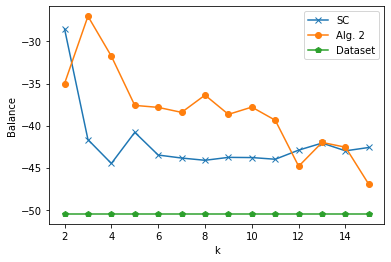

In [61]:
axis_x = np.arange(2, 16, 1)

plt.plot(axis_x, unfair_results, label = 'SC', marker='x')
plt.plot(axis_x, fair_results, label = 'Alg. 2', marker='o')
plt.plot(axis_x, dataset_fairness, label = 'Dataset', marker='p')

print('Spectral Clustering results :', np.mean(unfair_results))
print('Fair Spectral Clustering results :', np.mean(fair_results))
plt.xlabel('k')
# Set the y axis label of the current axis.
plt.ylabel('Balance')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [62]:
fair_results = []
unfair_results = []

#unfair_ratio_cuts = []
#fair_ratio_cuts = []

for k in range(2,16):
    labels = un_spectral(G, k, normalised=True)
    fair_labels = norm_spectral_fair(G, k, labels)
    
    fair_results.append(balance(gender_partition.astype(int), fair_labels))
    unfair_results.append(balance(gender_partition.astype(int), labels))
    
    #unfair_ratio_cuts.append(labels_rc)
    #fair_ratio_cuts.append(fair_labels_rc)

Spectral Clustering results : -35.163765995908854
Fair Spectral Clustering results : -32.713749940535656


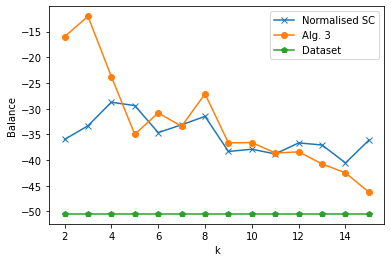

In [63]:
axis_x = np.arange(2, 16, 1)

plt.plot(axis_x, unfair_results, label = 'Normalised SC', marker='x')
plt.plot(axis_x, fair_results, label = 'Alg. 3', marker='o')
plt.plot(axis_x, dataset_fairness, label = 'Dataset', marker='p')

print('Spectral Clustering results :', np.mean(unfair_results))
print('Fair Spectral Clustering results :', np.mean(fair_results))
plt.xlabel('k')
# Set the y axis label of the current axis.
plt.ylabel('Balance')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()